# Tugas Besar IF2220 Probabilitas dan Statistika

### Penarikan Kesimpulan dan Pengujian Hipotesis

> 13521109 Rizky Abdillah Rasyid

> 13521119 Muhammad Rizky Sya'ban

## Inisialisasi *library* yang akan digunakan.

In [433]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Markdown, display

df = pd.read_csv("dataset/anggur.csv")



## PROBLEM 1
### Menulis deskripsi statistika (Descriptive Statistics) dari semua kolom pada data yang bersifat numerik, terdiri dari mean, median, modus, standar deviasi, variansi, range, nilai minimum, maksimum, kuartil, IQR, skewness dan kurtosis.

In [434]:
display(Markdown(("#### Mean, Median, Standar Deviasi, Variansi, Range, Minimum, Maximum, Kuartil, IQR, Skewness, dan Kurtosis")))

stat = pd.DataFrame()

# Calculate the mode for each column
mode = df.mode()
mode_string = mode.apply(lambda x: ', '.join(x.astype(str)), axis=0)
mode_string = mode_string.replace('', 'multivalued', regex=False)


stat["Mean"] = df.mean()
stat["Median"] = df.median()
stat["Mode"] = mode_string
stat["Deviasi"] = df.std()
stat["Var"] = df.var()
stat["Min"] = df.min()
stat["Max"] = df.max()
stat["Range"] = stat["Max"] - stat["Min"]
stat["Q1"] = df.quantile(0.25)
stat["Q2"] = df.quantile(0.5)
stat["Q3"] = df.quantile(0.75)
stat["IQR"] = stat["Q3"] - stat["Q1"]
stat["Skewness"] = df.skew()
stat["Kurtosis"] = df.kurtosis()
stat

import pandas as pd

# Create a sample dataframe
data = {'col1': [1, 2, 3, 4, 5],
        'col2': ['a', 'b', 'c', 'c', 'd'],
        'col3': ['x', 'y', 'y', 'z', 'z'],
        'col4': [10, 20, 30, 40, 50],
        'col5': [100, 200, 300, 400, 500]}
tempDf = pd.DataFrame(data)

# Calculate the mode for all columns
for column in tempDf.columns:
    if len(tempDf[column].unique()) == 1:
        # If the column has only one unique value, then it has a single-valued mode
        mode_value = tempDf[column].unique()[0]
        print(f"Column '{column}' has a single-valued mode of {mode_value}")
    else:
        # If the column has multiple unique values, then it has a multi-valued mode
        value_counts = tempDf[column].value_counts()
        max_count = value_counts.max()
        mode_values = list(value_counts[value_counts == max_count].index)
        print(f"Column '{column}' has a multi-valued mode of {mode_values}")


#### Mean, Median, Standar Deviasi, Variansi, Range, Minimum, Maximum, Kuartil, IQR, Skewness, dan Kurtosis

Column 'col1' has a multi-valued mode of [1, 2, 3, 4, 5]
Column 'col2' has a multi-valued mode of ['c']
Column 'col3' has a multi-valued mode of ['y', 'z']
Column 'col4' has a multi-valued mode of [10, 20, 30, 40, 50]
Column 'col5' has a multi-valued mode of [100, 200, 300, 400, 500]


In [435]:
display(Markdown("#### Modus [*multivalued*]"))
df.mode()

#### Modus [*multivalued*]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.54,0.5546,0.3019,0.032555,0.015122,0.194679,35.20,0.9959,3.34,0.59,9.86,8.0
1,NaN,NaN,NaN,0.033333,0.020794,0.621628,37.25,0.9961,NaN,NaN,10.31,NaN
2,NaN,NaN,NaN,0.051774,0.024259,0.860177,39.64,0.9965,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,0.077156,0.027209,3.032139,40.61,0.9970,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,0.084744,0.032111,3.129885,41.05,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
995,NaN,NaN,NaN,5.210260,0.131425,26.630490,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,5.217429,0.133656,26.665773,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,5.252864,0.135368,26.822626,NaN,NaN,NaN,NaN,NaN,NaN
998,NaN,NaN,NaN,5.299524,0.135790,27.006307,NaN,NaN,NaN,NaN,NaN,NaN


## PROBLEM 2
### Membuat Visualisasi plot distribusi, dalam bentuk histogram dan boxplot untuk setiap kolom numerik. Berikan uraian penjelasan kondisi setiap kolom berdasarkan kedua plot tersebut.

In [436]:
dataHeader = df.columns

plt.rcParams['boxplot.boxprops.linewidth'] = 2
plt.rcParams['boxplot.whiskerprops.linewidth'] = 2
plt.rcParams['boxplot.capprops.linewidth'] = 2
plt.rcParams['boxplot.medianprops.linewidth'] = 2
plt.rcParams['boxplot.flierprops.marker'] = 'o'
plt.rcParams['boxplot.flierprops.markersize'] = 8
plt.rcParams['boxplot.flierprops.linewidth'] = 2
plt.rcParams['boxplot.flierprops.markeredgecolor'] = '#ab1ba5'


In [437]:
def problem2(attribute) :

    display(Markdown(f"<h3 style='text-align:center; text-transform: uppercase'> {attribute} </h3>"))

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(11, 10), sharex=True)
    plt.subplot(2, 1, 1)

    ax1.set_title(attribute.upper())
    ax1.hist(df[attribute], bins=10, rwidth=0.8, color="#ab1ba5")
    ax1.set_facecolor('#d7dbe2')
    
    ax2.boxplot(df[attribute], vert=False, widths=0.5, patch_artist=True, boxprops=dict(facecolor='#e5bae4', color='#ab1ba5'), capprops=dict(color='#ab1ba5'), medianprops=dict(color='#ab1ba5'), flierprops=dict(color='#ab1ba5'), whiskerprops=dict(color='#ab1ba5'))
    ax2.set_facecolor('#d7dbe2')
    ax2.tick_params(axis='y', which='both', length=0)
    ax2.yaxis.tick_right()

    plt.show()


<h3 style='text-align:center; text-transform: uppercase'> fixed acidity </h3>

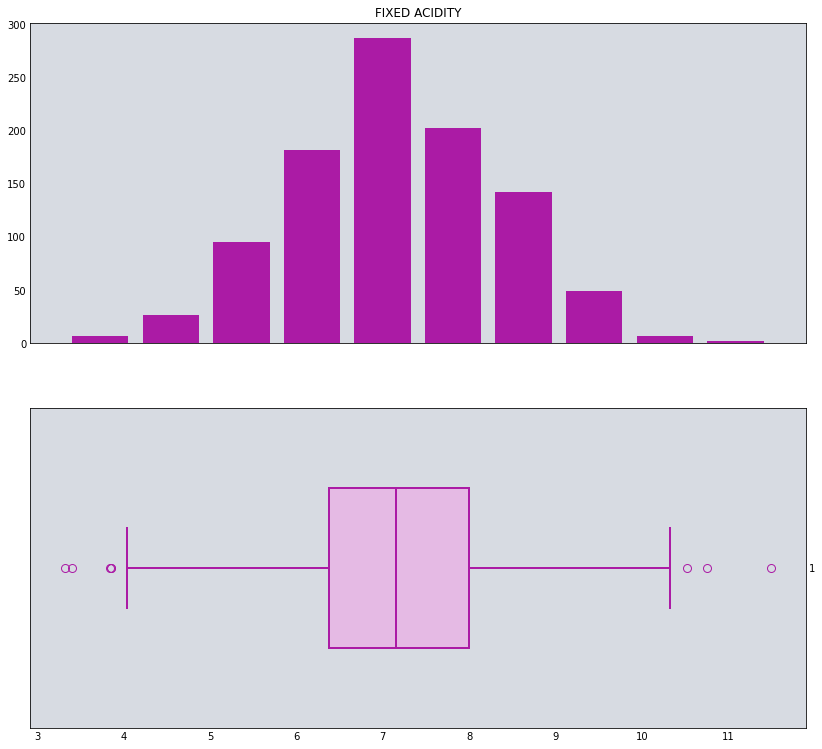

In [438]:
problem2(dataHeader[0])

Berdasarkan histogram dan box plot yang terbentuk dapat dilihat bahwa data *Fixed Acidity* terdistribusi secara **simetris**. Walaupun konsentrasi data cukup besar pada bagian kiri pusat distribusi, namun *skew* tersebut **hampir tidak terlihat**. Dapat dilihat juga cukup sedikit *outliers* yang berada diatas nilai *maximum whisker* ataupunyang berada dibawah nilai *minimum whisker*. Oleh karena itu, dapat dikatakan bahwa data *Fixed Acidity* cukup konsisten terhadap pusat distribusi.

<h3 style='text-align:center; text-transform: uppercase'> volatile acidity </h3>

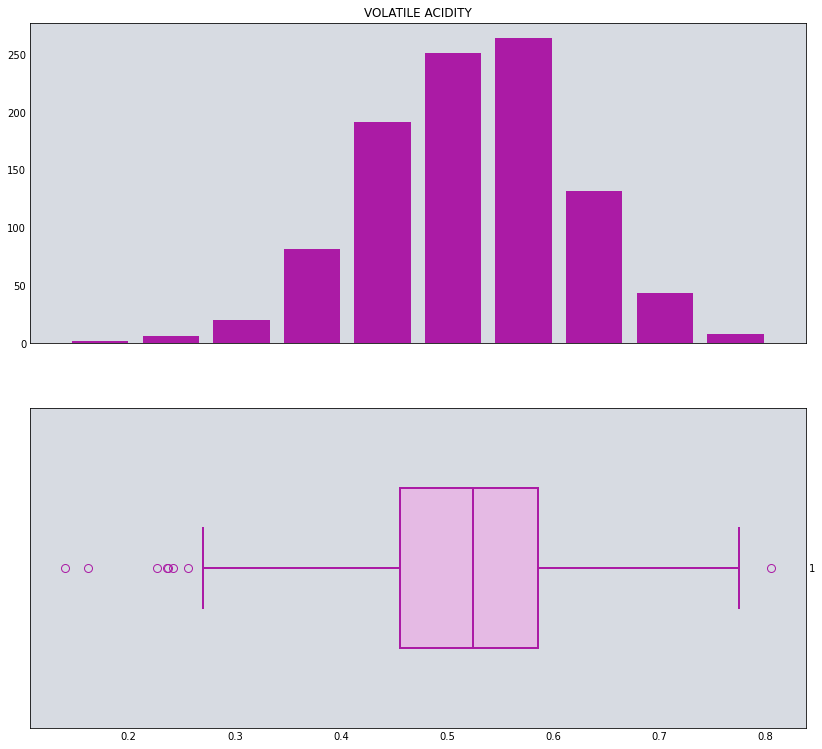

In [439]:
problem2(dataHeader[1])

Berdasarkan histogram dan box plot yang terbentuk dapat dilihat bahwa data *Volatile Acidity* secara umum terdistribusi secara **simetris** namun data cenderung lebih banyak terkonsentrasi pada sisi kiri pusat distribusi sehingga menyebabkan data tersebut cenderung miring ke kiri (*left-skewed*). Dapat dilihat juga bahwa terdapat cukup banyak *outliers* di kiri nilai *minimum whisker* yang menyebabkan panjangnya ekor distribusi di sisi kiri *mean*. Oleh karena itu, dapat dikatakan bahwa data *Volatile Acidity* **kurang konsisten** terhadap pusat distribusinya.

<h3 style='text-align:center; text-transform: uppercase'> citric acid </h3>

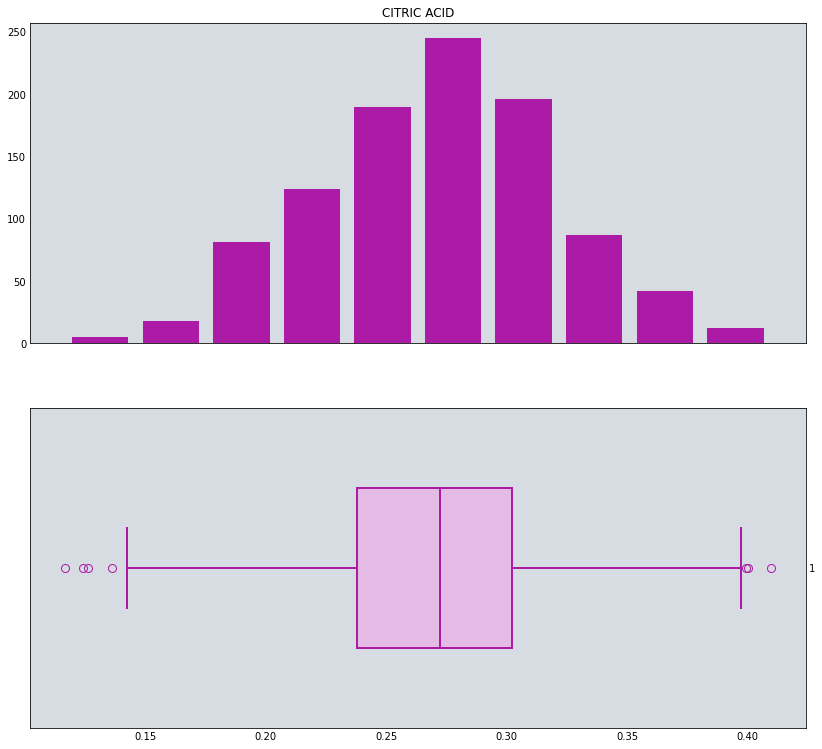

In [440]:
problem2(dataHeader[2])

Berdasarkan histogram dan box plot yang terbentuk dapat dilihat bahwa data *Citric Acid* terdistribusi secara **simetris**. Walaupun konsentrasi data di sisi kiri pusat distribusi agak lebih tinggi dibanding di sisi kanannya, namun *skew* tersebut **hampir tidak terlihat**. Dapat dilihat juga cukup sedikit *outliers* yang berada dikanan nilai *maximum whisker* dan di kiri nilai *minimum whisker*. Oleh karena itu, dapat dikatakan bahwa data *Citric Acid* cukup **konsisten** terhadap pusat distribusi.

<h3 style='text-align:center; text-transform: uppercase'> residual sugar </h3>

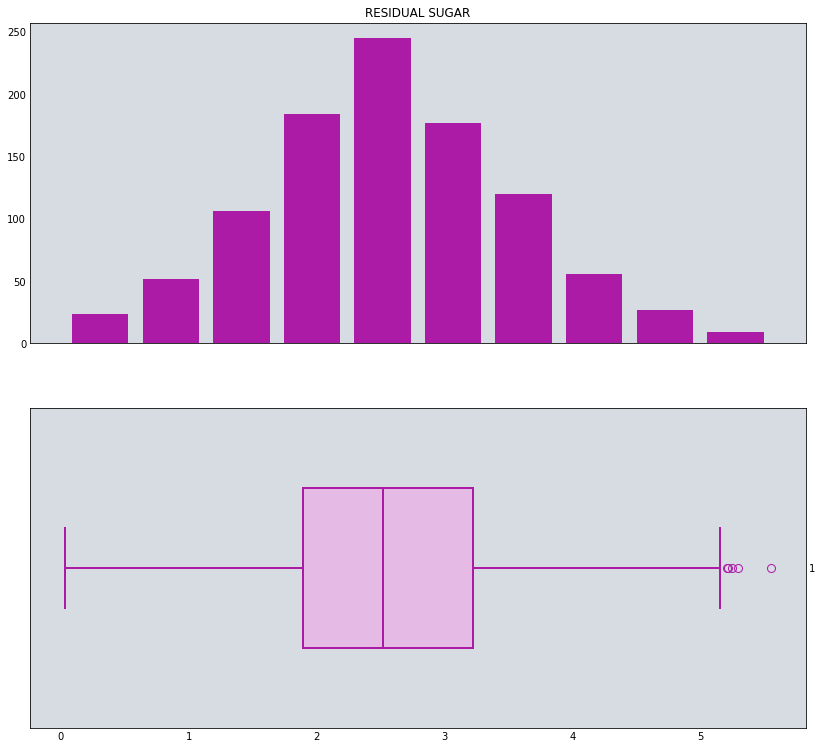

In [441]:
problem2(dataHeader[3])

Berdasarkan histogram dan box plot yang terbentuk dapat dilihat bahwa data *Residual Sugar* secara umum terdistribusi secara **simetris**, namun cenderung lebih banyak data yang terkonsentrasi pada sisi kanan pusat distribusi sehingga menyebabkan data tersebut cenderung miring ke kanan (*right-skewed*). Dapat dilihat juga bahwa terdapat cukup banyak *outliers* yang berada di kanan nilai *maximum whisker* yang menyebabkan panjangnya ekor distribusi di sisi kanan pusat distribusi.

<h3 style='text-align:center; text-transform: uppercase'> chlorides </h3>

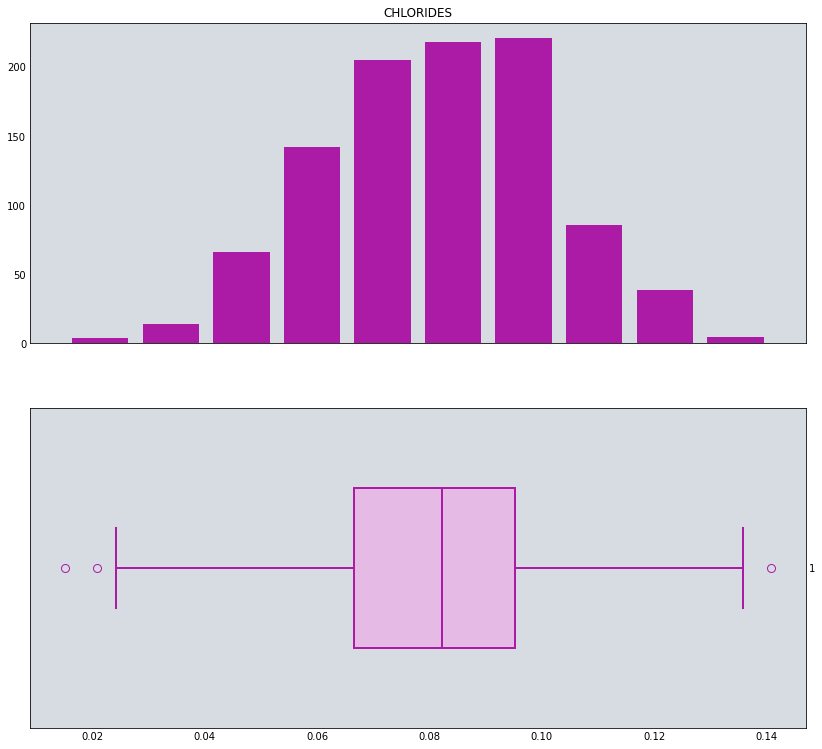

In [442]:
problem2(dataHeader[4])

Berdasarkan histogram dan box plot yang terbentuk dapat dilihat bahwa data *Chlorides* secara umum terdistribusi secara **simetris** namun data cenderung lebih banyak terkonsentrasi pada sisi kiri pusat distribusi sehingga menyebabkan data tersebut cenderung miring ke kiri (*left-skewed*). Dapat dilihat juga bahwa hanya terdapat **sedikit *outliers*** dikiri nilai *minimum whisker* ataupun dikanan nilai *maximum whisker*.

<h3 style='text-align:center; text-transform: uppercase'> free sulfur dioxide </h3>

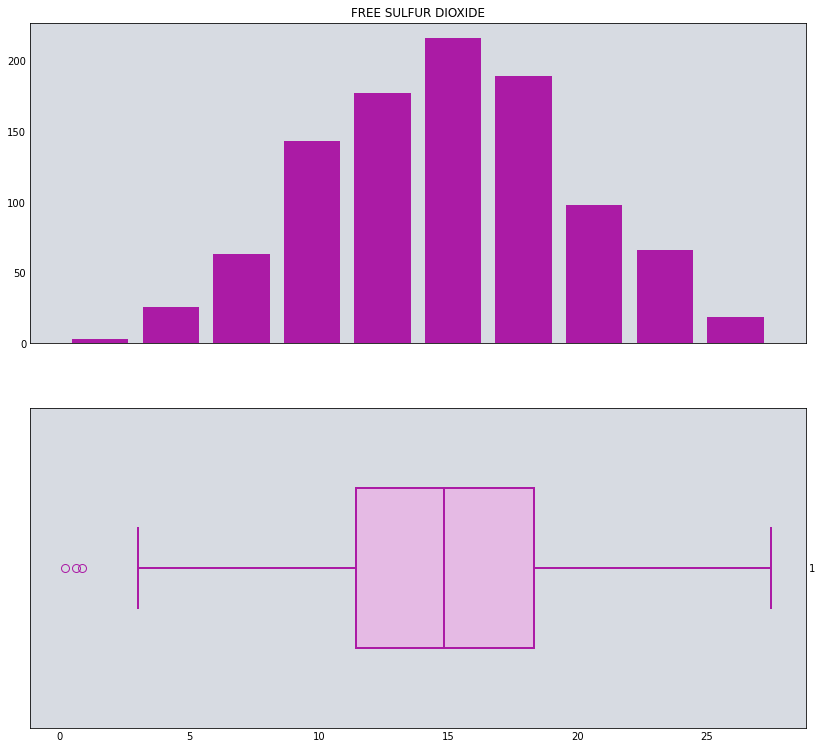

In [443]:
problem2(dataHeader[5])

Berdasarkan histogram dan box plot yang terbentuk dapat dilihat bahwa data *Free Sulfur Dioxide* terdistribusi secara **simetris**. Walaupun konsentrasi data sedikit lebih besar pada sisi kanan pusat distribusi, namun *skew* tersebut **hampir tidak terlihat**. Dapat dilihat juga cukup sedikit *outliers* yang berada dikiri nilai *minimum whisker* dan tidak ada *outliers* yang berada dikanan nilai *maximum whisker*. Oleh karena itu, dapat dikatakan bahwa data *Free Sulfur Dioxide* **cukup konsisten** terhadap pusat distribusi.

<h3 style='text-align:center; text-transform: uppercase'> total sulfur dioxide </h3>

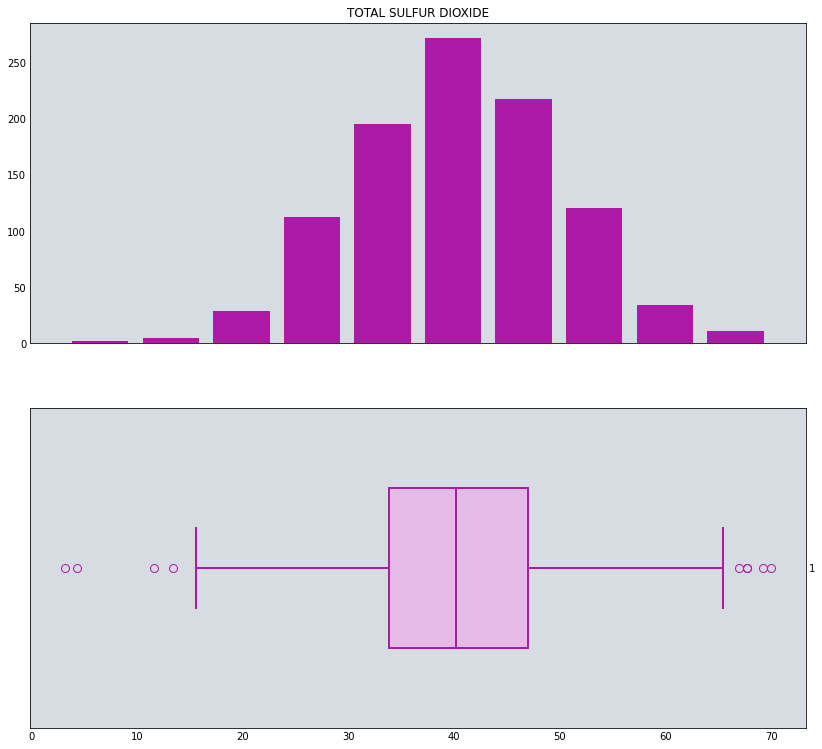

In [444]:
problem2(dataHeader[6])

Berdasarkan histogram dan box plot yang terbentuk dapat dilihat bahwa data *Total Sulfur Dioxide* terdistribusi secara **simetris**. Walaupun konsentrasi data sedikit lebih besar pada sisi kanan pusat distribusi, namun *skew* tersebut **hampir tidak terlihat**. Dapat dilihat juga cukup sedikit *outliers* yang berada dikiri nilai *minimum whisker* dan ataupun yang berada dikanan nilai *maximum whisker*, namun *outliers* di sisi kiri berbeda cukup jauh sehingga menyebabkan memanjangnya ekor distribusi data di sisi kiri.

<h3 style='text-align:center; text-transform: uppercase'> density </h3>

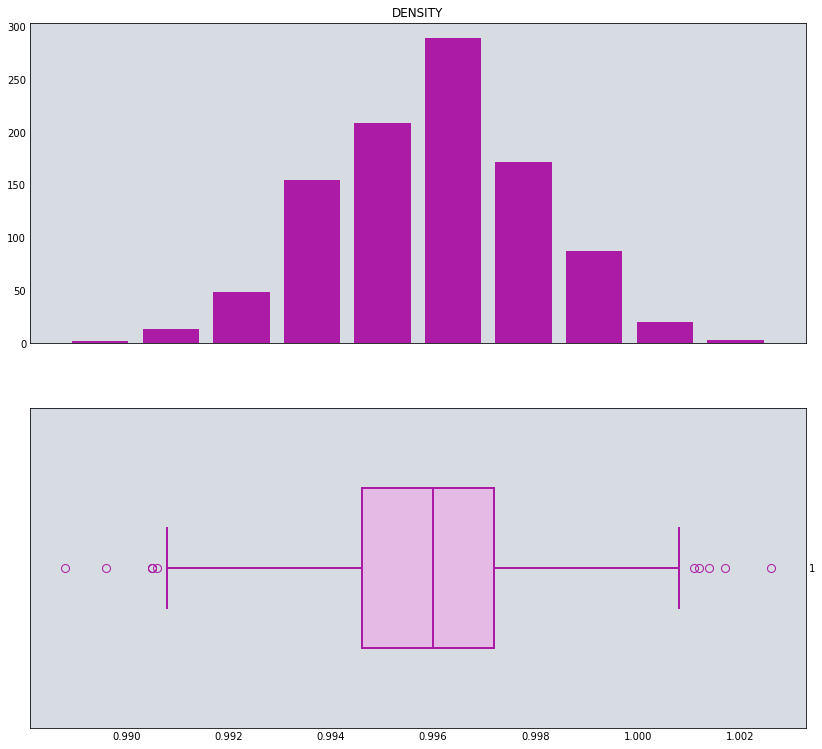

In [445]:
problem2(dataHeader[7])

Berdasarkan histogram dan box plot yang terbentuk dapat dilihat bahwa data *Density* secara umum terdistribusi secara **simetris** namun data cenderung lebih banyak terkonsentrasi pada sisi kiri pusat distribusi, walaupun demikian *skew* tersebut **hampir tidak terlihat**. Dapat dilihat juga bahwa hanya terdapat beberapa *outliers* dikiri nilai *minimum whisker* ataupun dikanan nilai *maximum whisker*. Oleh karena itu, dapat dikatakan bahwa data *Density* **kurang konsisten** terhadap pusat distribusinya.

<h3 style='text-align:center; text-transform: uppercase'> pH </h3>

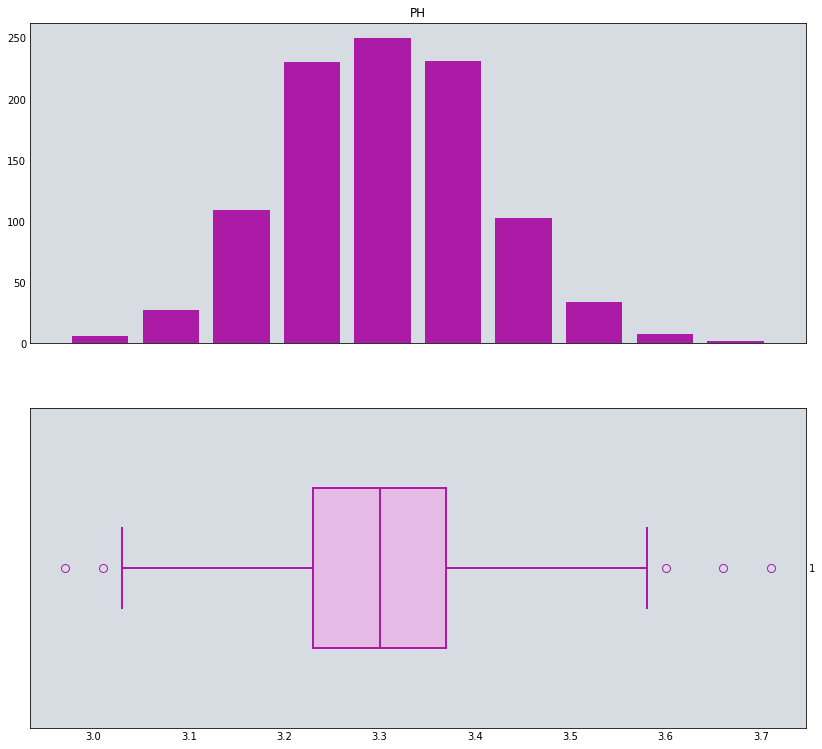

In [446]:
problem2(dataHeader[8])

Berdasarkan histogram dan box plot yang terbentuk dapat dilihat bahwa data *pH* terdistribusi secara **simetris**. Walaupun konsentrasi data cukup besar pada bagian kanan pusat distribusi, namun *skew* tersebut **hampir tidak terlihat**. Dapat dilihat juga cukup sedikit *outliers* yang berada di kanan nilai *maximum whisker* ataupun yang berada di kiri nilai *minimum whisker*. Oleh karena itu, dapat dikatakan bahwa data *pH* cukup konsisten terhadap pusat distribusi walaupun memiliki ekor distribusi yang cukup panjang

<h3 style='text-align:center; text-transform: uppercase'> sulphates </h3>

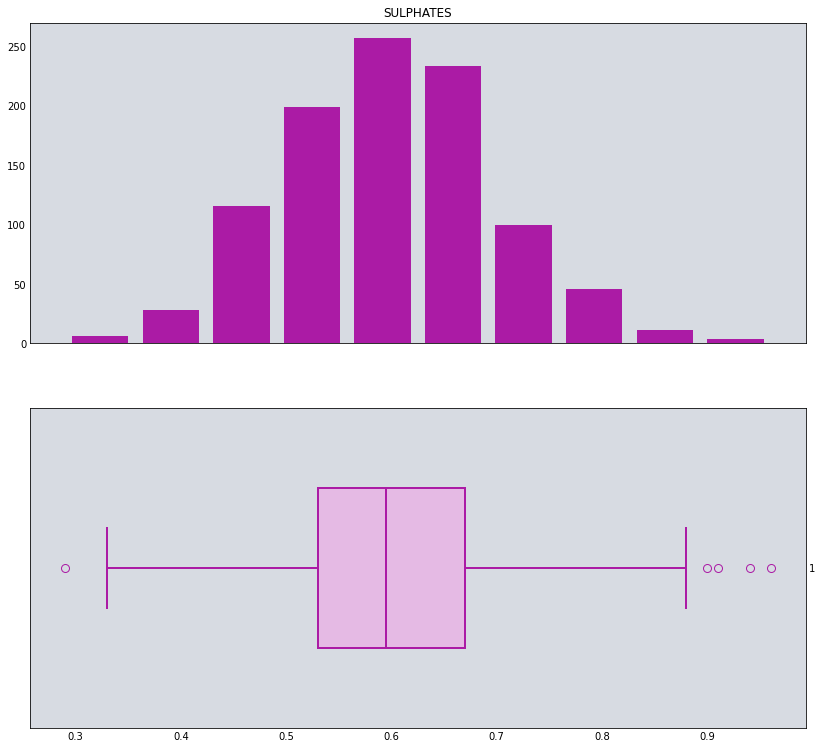

In [447]:
problem2(dataHeader[9])

Berdasarkan histogram dan box plot yang terbentuk dapat dilihat bahwa data *Sulphates* terdistribusi secara **simetris**. Walaupun konsentrasi data cukup besar pada bagian kanan pusat distribusi, namun *skew* tersebut **hampir tidak terlihat**. Dapat dilihat juga cukup sedikit *outliers* yang berada di kanan nilai *maximum whisker* ataupun yang berada di kiri nilai *minimum whisker*. Oleh karena itu, dapat dikatakan bahwa data *Sulphates* cukup konsisten terhadap pusat distribusi.

<h3 style='text-align:center; text-transform: uppercase'> alcohol </h3>

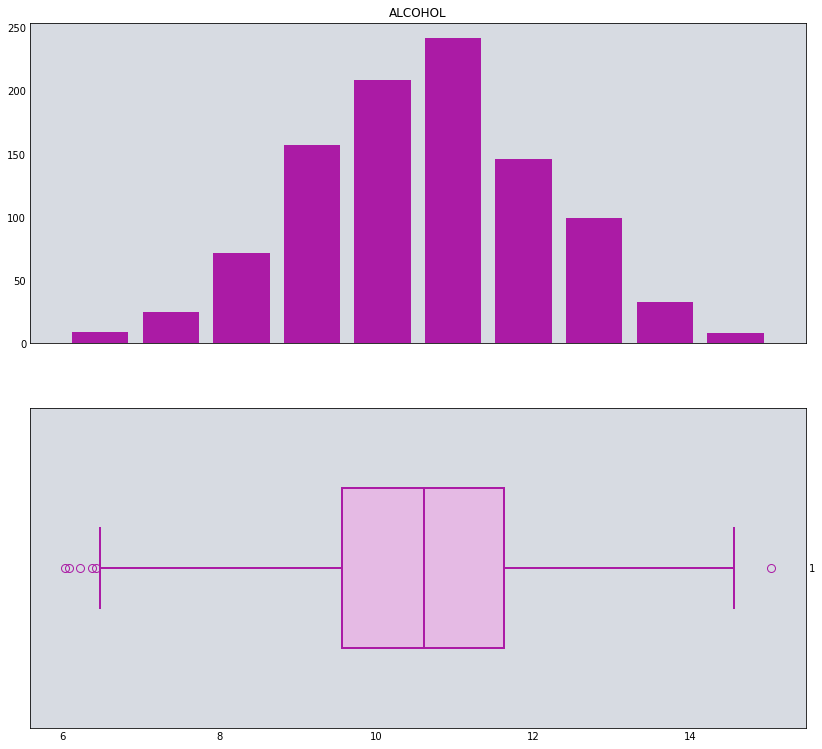

In [448]:
problem2(dataHeader[10])

Berdasarkan histogram dan box plot yang terbentuk dapat dilihat bahwa data *Alcohol* secara umum terdistribusi secara **simetris**, namun cenderung lebih banyak data yang terkonsentrasi pada sisi kiri pusat distribusi sehingga menyebabkan data tersebut cenderung miring ke kiri (*left-skewed*). Dapat dilihat juga bahwa terdapat cukup banyak *outliers* yang berada di kiri nilai *minimum whisker* yang menyebabkan panjangnya ekor distribusi di sisi kiri pusat distribusi. 

<h3 style='text-align:center; text-transform: uppercase'> quality </h3>

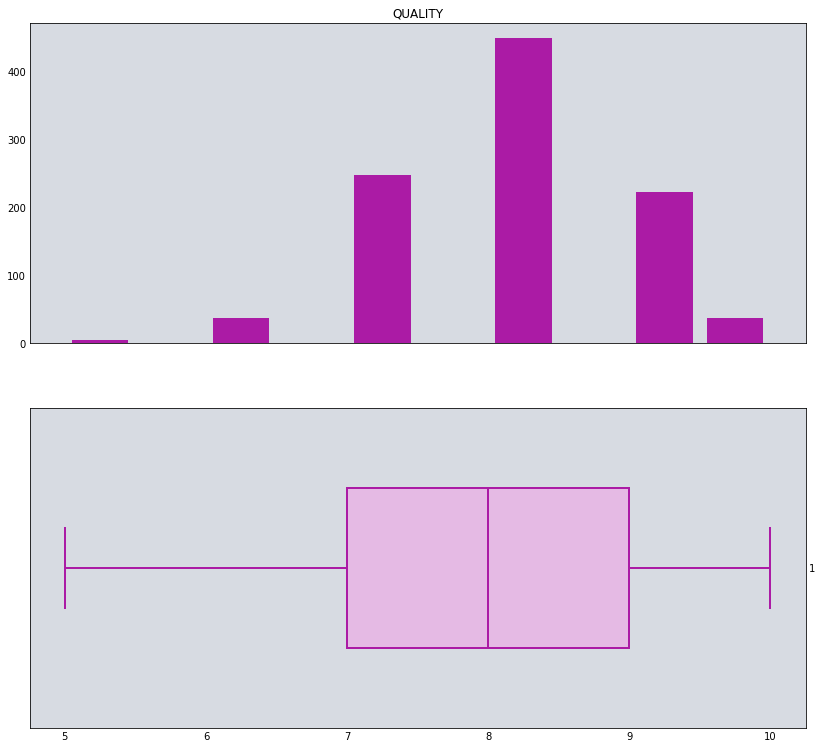

In [449]:
problem2(dataHeader[11])

Berdasarkan histogram dan box plot yang terbentuk dapat dilihat bahwa data *Quality* terdistribusi secara **simetris**. Walaupun konsentrasi data cukup besar pada bagian kiri pusat distribusi sehingga menyebabkan data tersebut cenderung miring ke kiri (*left-skewed*). Dapat dilihat juga bahwa tidak ada *outliers* yang berada di kanan nilai *maximum whisker* ataupun yang di kiri nilai *minimum whisker* hanya saja ekor distribusi sedikit lebih panjang di sisi kirinya.

## PROBLEM 3
### Menentukan setiap kolom numerik berdistribusi normal atau tidak. Gunakan normality test yang dikaitkan dengan histogram plot

In [450]:
import scipy.stats as stats

In [451]:
def problem3(attribute):
    stat, p_val = stats.normaltest(df[attribute])
    display(Markdown("### D’Agostino’s K-squared Test, $p$ = %.10f" % (p_val)))
    if p_val > 0.05 :
        display(Markdown("### Kolom %s Berdistribusi Normal" % (attribute)))
    else :
        display(Markdown("### Kolom %s Berdistribusi Tidak Normal" % (attribute)))
    plt.subplots()
    df[attribute].plot(kind="hist", color="#ab1ba5", linewidth=1.9, edgecolor="#550d52", bins=10, density="True").set_facecolor('#c6ccd6')
    df[attribute].plot(kind="kde", color="#220521", linewidth=2, figsize=(12, 6))
    plt.title(attribute)
    plt.show()

### D’Agostino’s K-squared Test, $p$ = 0.9308584274

### Kolom fixed acidity Berdistribusi Normal

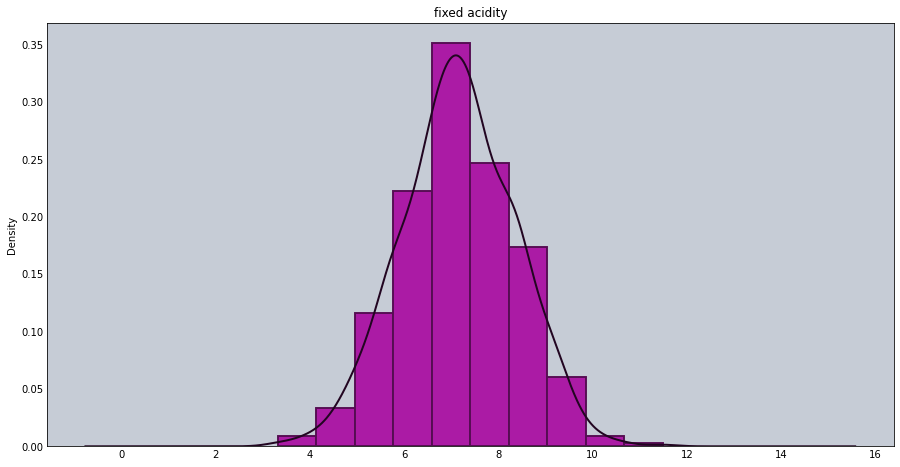

In [452]:
problem3(dataHeader[0])

## PROBLEM 4
### Melakukan Test Hipotesis 1 Sample

In [453]:
import scipy.stats as st
from statsmodels.stats.weightstats import ztest
from statsmodels.stats.proportion import proportions_ztest

### a. Nilai rata-rata pH di atas 3.29?

$H_0$ : Nilai rata-rata pH = $3.29$ ($μ = 3.29$)

$H_0$ : Nilai rata-rata pH > $3.29$ ($μ > 3.29$)

Tingkat signifikan: $\alpha = 0.05$

Uji Statistik: Single Sample Right Tailed Z Test dengan *Critical Section* $z > z_\alpha$

Rumus perhitungan nilai $z$: $$ z = \frac{\bar{x_{}} - μ_{0}} {\sigma/\sqrt{n}} $$

Jika $z$ berada pada *critical section* ($z > z_\alpha$), maka nilai $p < \alpha$ dan $H_0$ ditolak

Jika $z$ tidak berada pada *critical section* ($z ≤ z_\alpha$), maka nilai $p ≥ \alpha$ dan $H_0$ tidak ditolak


In [454]:
m_0 = 3.29
signifikan = 0.05

z_val, p_val = ztest(df["volatile acidity"], value=m_0, alternative="larger")
display(Markdown(f"Didapatkan nilai $z = {round(z_val, 4)}$ dan $p = {round(p_val, 4)}$"))

z_signifikan = st.norm.ppf(1-signifikan)
display(Markdown(f"Didapatkan nilai $z_\\alpha = {round(z_signifikan, 4)}$"))

if z_val > z_signifikan:
    display(Markdown(f"Keputusan: Tolak $H_0$ dikarenakan $z$ berada pada *critical section* ($z > {round(z_signifikan, 4)}$)"))
    display(Markdown(f"Tes Signifikan: Tolak $H_0$ dikarenakan $p$ lebih kecil dari tingkat signifikan yang diinginkan ($p < {signifikan}$)"))
    display(Markdown(f"Jadi, nilai rata-rata pH lebih dari ${m_0}$"))
else:
    display(Markdown(f"Keputusan: Tidak menolak $H_0$ dikarenakan $z$ tidak berada pada *critical section* ($z ≤ {round(z_signifikan, 4)}$)"))
    display(Markdown(f"Tes Signifikan: Tidak menolak $H_0$ dikarenakan $p$ lebih besar atau sama dengan tingkat signifikan yang diinginkan ($p ≥ {signifikan}$)"))
    display(Markdown(f"Jadi, nilai rata-rata pH sama dengan ${m_0}$"))

Didapatkan nilai $z = -913.6166$ dan $p = 1.0$

Didapatkan nilai $z_\alpha = 1.6449$

Keputusan: Tidak menolak $H_0$ dikarenakan $z$ tidak berada pada *critical section* ($z ≤ 1.6449$)

Tes Signifikan: Tidak menolak $H_0$ dikarenakan $p$ lebih besar atau sama dengan tingkat signifikan yang diinginkan ($p ≥ 0.05$)

Jadi, nilai rata-rata pH sama dengan $3.29$

## PROBLEM 5

### Test Hipotesis 2 Sampel

### a. Data kolom fixed acidity dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata kedua bagian tersebut sama?

$H_0$: Nilai rata-rata kolom awal *Fixed Acidity* sama dengan nilai rata-rata kolom akhir *Fixed Acidity* ($μ_{1} - μ_{2} = 0$)

$H_1$: Nilai rata-rata kolom awal *Fixed Acidity* tidak sama dengan nilai rata-rata kolom akhir *Fixed Acidity* ($μ_{1} - μ_{2} ≠ 0$)

Tingkat Signifikan: $\alpha = 0.05$

Uji Statistik: Double Sample Two Tailed Z Test dengan *Critical Section* $z < -z_{\alpha/2}$ atau $z > z_{\alpha/2}$

Rumus perhitungan nilai $z$:

$$ z = \frac{(\bar{x_{1}} - \bar{x_{2}}) - (μ_{1} - μ_{2})} {\sqrt{\sigma_{1}^{2}/n_{1} + \sigma_{2}^{2}/n_{2}}} $$

Jika $z$ berada pada *critical section* ($z < -z_{\alpha/2}$ atau $z > z_{\alpha/2}$), maka nilai $p < \alpha$ dan $H_0$ ditolak

Jika $z$ tidak berada pada *critical section* ($z < -z_{\alpha/2}$ atau $z > z_{\alpha/2}$), maka nilai $p ≥ \alpha$ dan $H_0$ tidak ditolak

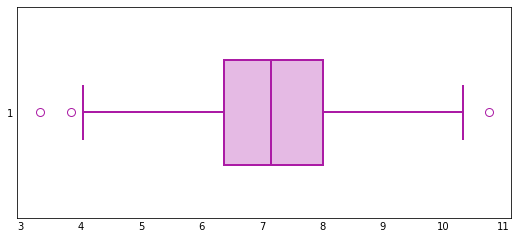

In [455]:
fig, ax = plt.subplots(figsize=(7, 3))
ax.boxplot(df["fixed acidity"][:len(df) // 2], vert=False, widths=0.5, patch_artist=True, boxprops=dict(facecolor='#e5bae4', edgecolor='#ab1ba5'), capprops=dict(color='#ab1ba5'), medianprops=dict(color='#ab1ba5'), flierprops=dict(markeredgecolor='#ab1ba5'), whiskerprops=dict(color='#ab1ba5'));

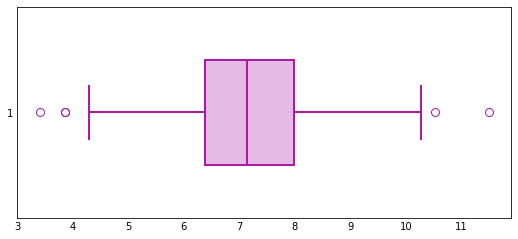

In [456]:
fig, ax = plt.subplots(figsize=(7, 3))
ax.boxplot(df["fixed acidity"][len(df) // 2:], vert=False, widths=0.5, patch_artist=True, boxprops=dict(facecolor='#e5bae4', edgecolor='#ab1ba5'), capprops=dict(color='#ab1ba5'), medianprops=dict(color='#ab1ba5'), flierprops=dict(markeredgecolor='#ab1ba5'), whiskerprops=dict(color='#ab1ba5'));

In [457]:
delta_miu = 0
alpha = 0.05

z, p = ztest(df["fixed acidity"][:len(df) // 2], df["fixed acidity"][len(df) // 2:], value=delta_miu, alternative="two-sided")
display(Markdown(f"Didapatkan nilai $z = {round(z, 4)}$ dan $p = {round(p, 4)}$"))

z_alpha_per_dua = st.norm.ppf(1 - alpha / 2)
display(Markdown(f"Didapatkan nilai $z_{{\\alpha/2}} = {round(z_alpha_per_dua, 4)}$"))

if z < -z_alpha_per_dua or z > z_alpha_per_dua:
    display(Markdown(f"Keputusan: Tolak $H_0$ dikarenakan $z$ berada pada *critical section* ($z < {round(-z_alpha_per_dua, 4)}$ atau $z > {round(z_alpha_per_dua, 4)}$)"))
    display(Markdown(f"Tes Signifikan: Tolak $H_0$ dikarenakan $p$ lebih kecil dari tingkat signifikan yang diinginkan ($p < {alpha}$)"))
    display(Markdown(f"Jadi, nilai rata-rata kolom awal *Fixed Acidity* tidak sama dengan nilai rata-rata kolom akhir *Fixed Acidity* ($μ_{{1}} - μ_{{2}} ≠ {delta_miu}$)"))
else:
    display(Markdown(f"Keputusan: Tidak menolak $H_0$ dikarenakan $z$ tidak berada pada *critical section* (${round(-z_alpha_per_dua, 4)} ≤ z ≤ {round(z_alpha_per_dua, 4)}$)"))
    display(Markdown(f"Tes Signifikan: Tidak menolak $H_0$ dikarenakan $p$ lebih besar atau sama dengan tingkat signifikan yang diinginkan ($p ≥ {alpha}$)"))
    display(Markdown(f"Jadi, nilai rata-rata kolom awal *Fixed Acidity* sama dengan nilai rata-rata kolom akhir *Fixed Acidity* ($μ_{{1}} - μ_{{2}} = {delta_miu}$)"))

Didapatkan nilai $z = 0.026$ dan $p = 0.9792$

Didapatkan nilai $z_{\alpha/2} = 1.96$

Keputusan: Tidak menolak $H_0$ dikarenakan $z$ tidak berada pada *critical section* ($-1.96 ≤ z ≤ 1.96$)

Tes Signifikan: Tidak menolak $H_0$ dikarenakan $p$ lebih besar atau sama dengan tingkat signifikan yang diinginkan ($p ≥ 0.05$)

Jadi, nilai rata-rata kolom awal *Fixed Acidity* sama dengan nilai rata-rata kolom akhir *Fixed Acidity* ($μ_{1} - μ_{2} = 0$)

### b. Data kolom chlorides dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata bagian awal lebih besar daripada bagian akhir sebesar 0.001?

### c. Benarkah rata-rata sampel 25 baris pertama kolom Volatile Acidity sama dengan rata-rata 25 baris pertama kolom Sulphates ?

### d. Bagian awal kolom residual sugar memiliki variansi yang sama dengan bagian akhirnya?

### e. Proporsi nilai setengah bagian awal alcohol yang lebih dari 7, adalah lebih besar daripada, proporsi nilai yang sama di setengah bagian akhir alcohol?